In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [13]:
columns=['Age','Work Class','Fnlwgt','Education','Education-num','Marital-status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','Hours-per-week','Native-country','Salary']

In [14]:
df=pd.read_csv('salary_dataset.csv',names=columns,header=0)

In [15]:
df

,Age,Work Class,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [16]:
df.shape

(32560, 15)

In [17]:
df.dtypes

Age                int64
Work Class        object
Fnlwgt             int64
Education         object
Education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hours-per-week     int64
Native-country    object
Salary            object
dtype: object

In [18]:

df.Native-country.unique()

AttributeError: 'DataFrame' object has no attribute 'Native'

In [19]:
df.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [20]:
df.Education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [21]:
df.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [22]:
df.Occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [23]:
df.Relationship.unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [24]:
df.Relationship.value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [25]:
df.Race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [26]:
df.Race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [27]:
df.Sex.unique()

array([' Male', ' Female'], dtype=object)

In [28]:
df.Sex.value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [29]:
df.Salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [30]:
df.Salary.value_counts()

 <=50K    24719
 >50K      7841
Name: Salary, dtype: int64

In [31]:
le = LabelEncoder()

In [32]:
list1 = ['Work Class','Education','Marital-status','Occupation','Relationship','Race','Sex','Native-country','Salary']
for val in list1:
    df[val] = le.fit_transform(df[val].astype(str))

In [33]:
df

,Age,Work Class,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Salary
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
Age               32560 non-null int64
Work Class        32560 non-null int32
Fnlwgt            32560 non-null int64
Education         32560 non-null int32
Education-num     32560 non-null int64
Marital-status    32560 non-null int32
Occupation        32560 non-null int32
Relationship      32560 non-null int32
Race              32560 non-null int32
Sex               32560 non-null int32
Capital-gain      32560 non-null int64
Capital-loss      32560 non-null int64
Hours-per-week    32560 non-null int64
Native-country    32560 non-null int32
Salary            32560 non-null int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


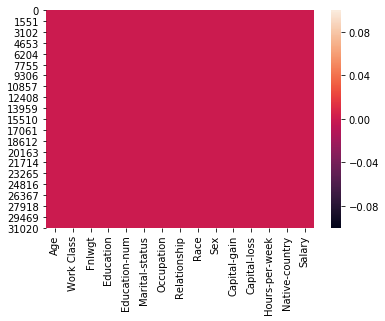

In [35]:
sns.heatmap(df.isnull())

In [36]:
df.describe()

,Age,Work Class,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Salary
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [37]:
dfcor = df.corr()
dfcor

,Age,Work Class,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Salary
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Work Class,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education-num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital-status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


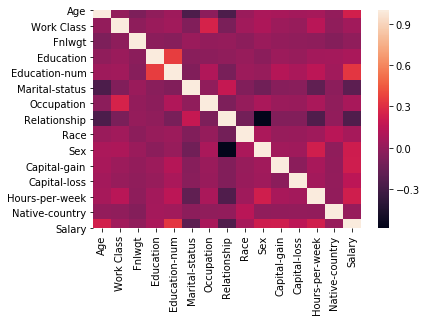

In [38]:
sns.heatmap(dfcor)

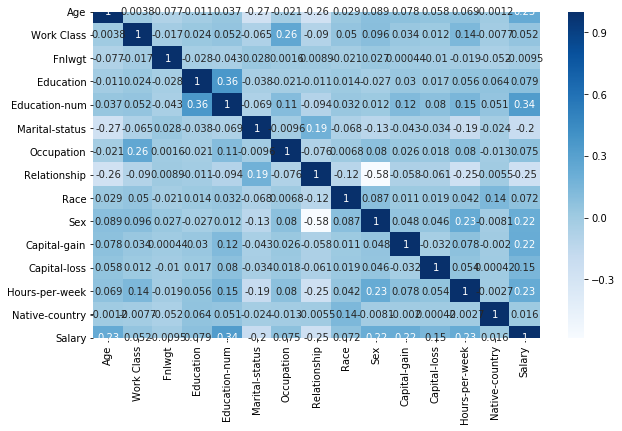

In [39]:
plt.figure(figsize = (10,6))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

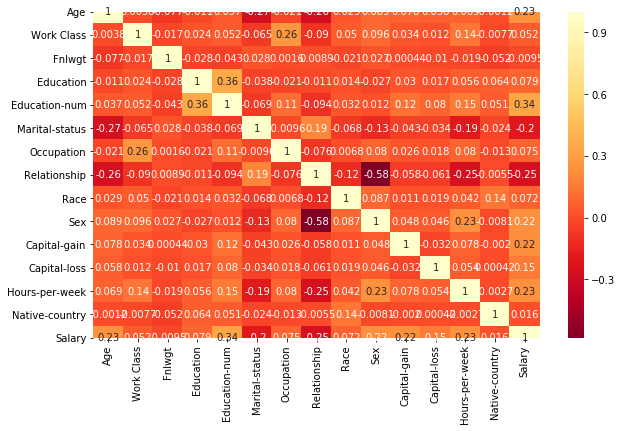

In [129]:
plt.figure(figsize = (10,6))
sns.heatmap(dfcor,cmap ='YlOrRd_r',annot = True)

In [40]:
collist=df.columns.values
ncol=15
nrows=15

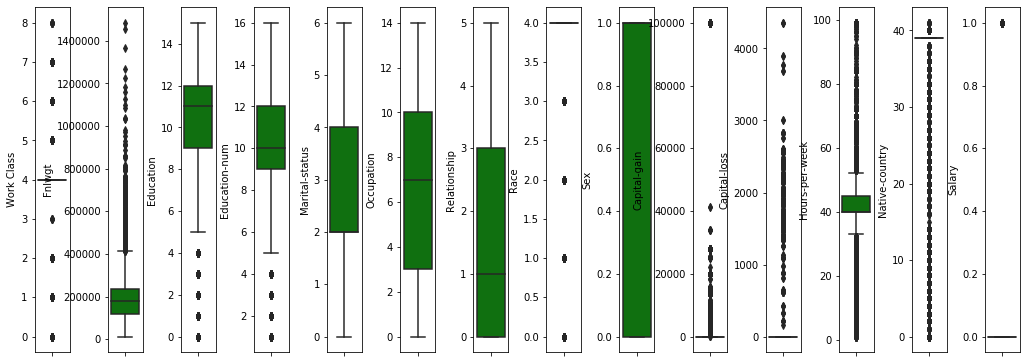

In [41]:
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

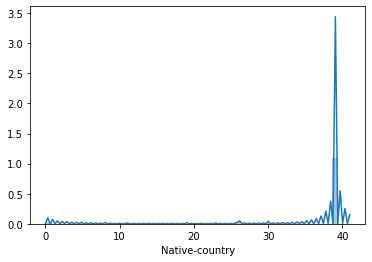

In [42]:
sns.distplot(df['Native-country'])

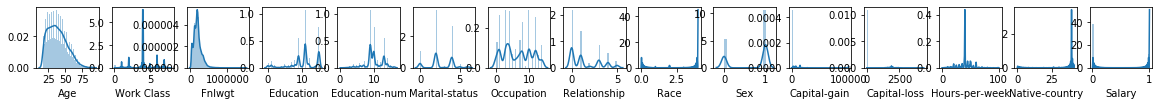

In [43]:
plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

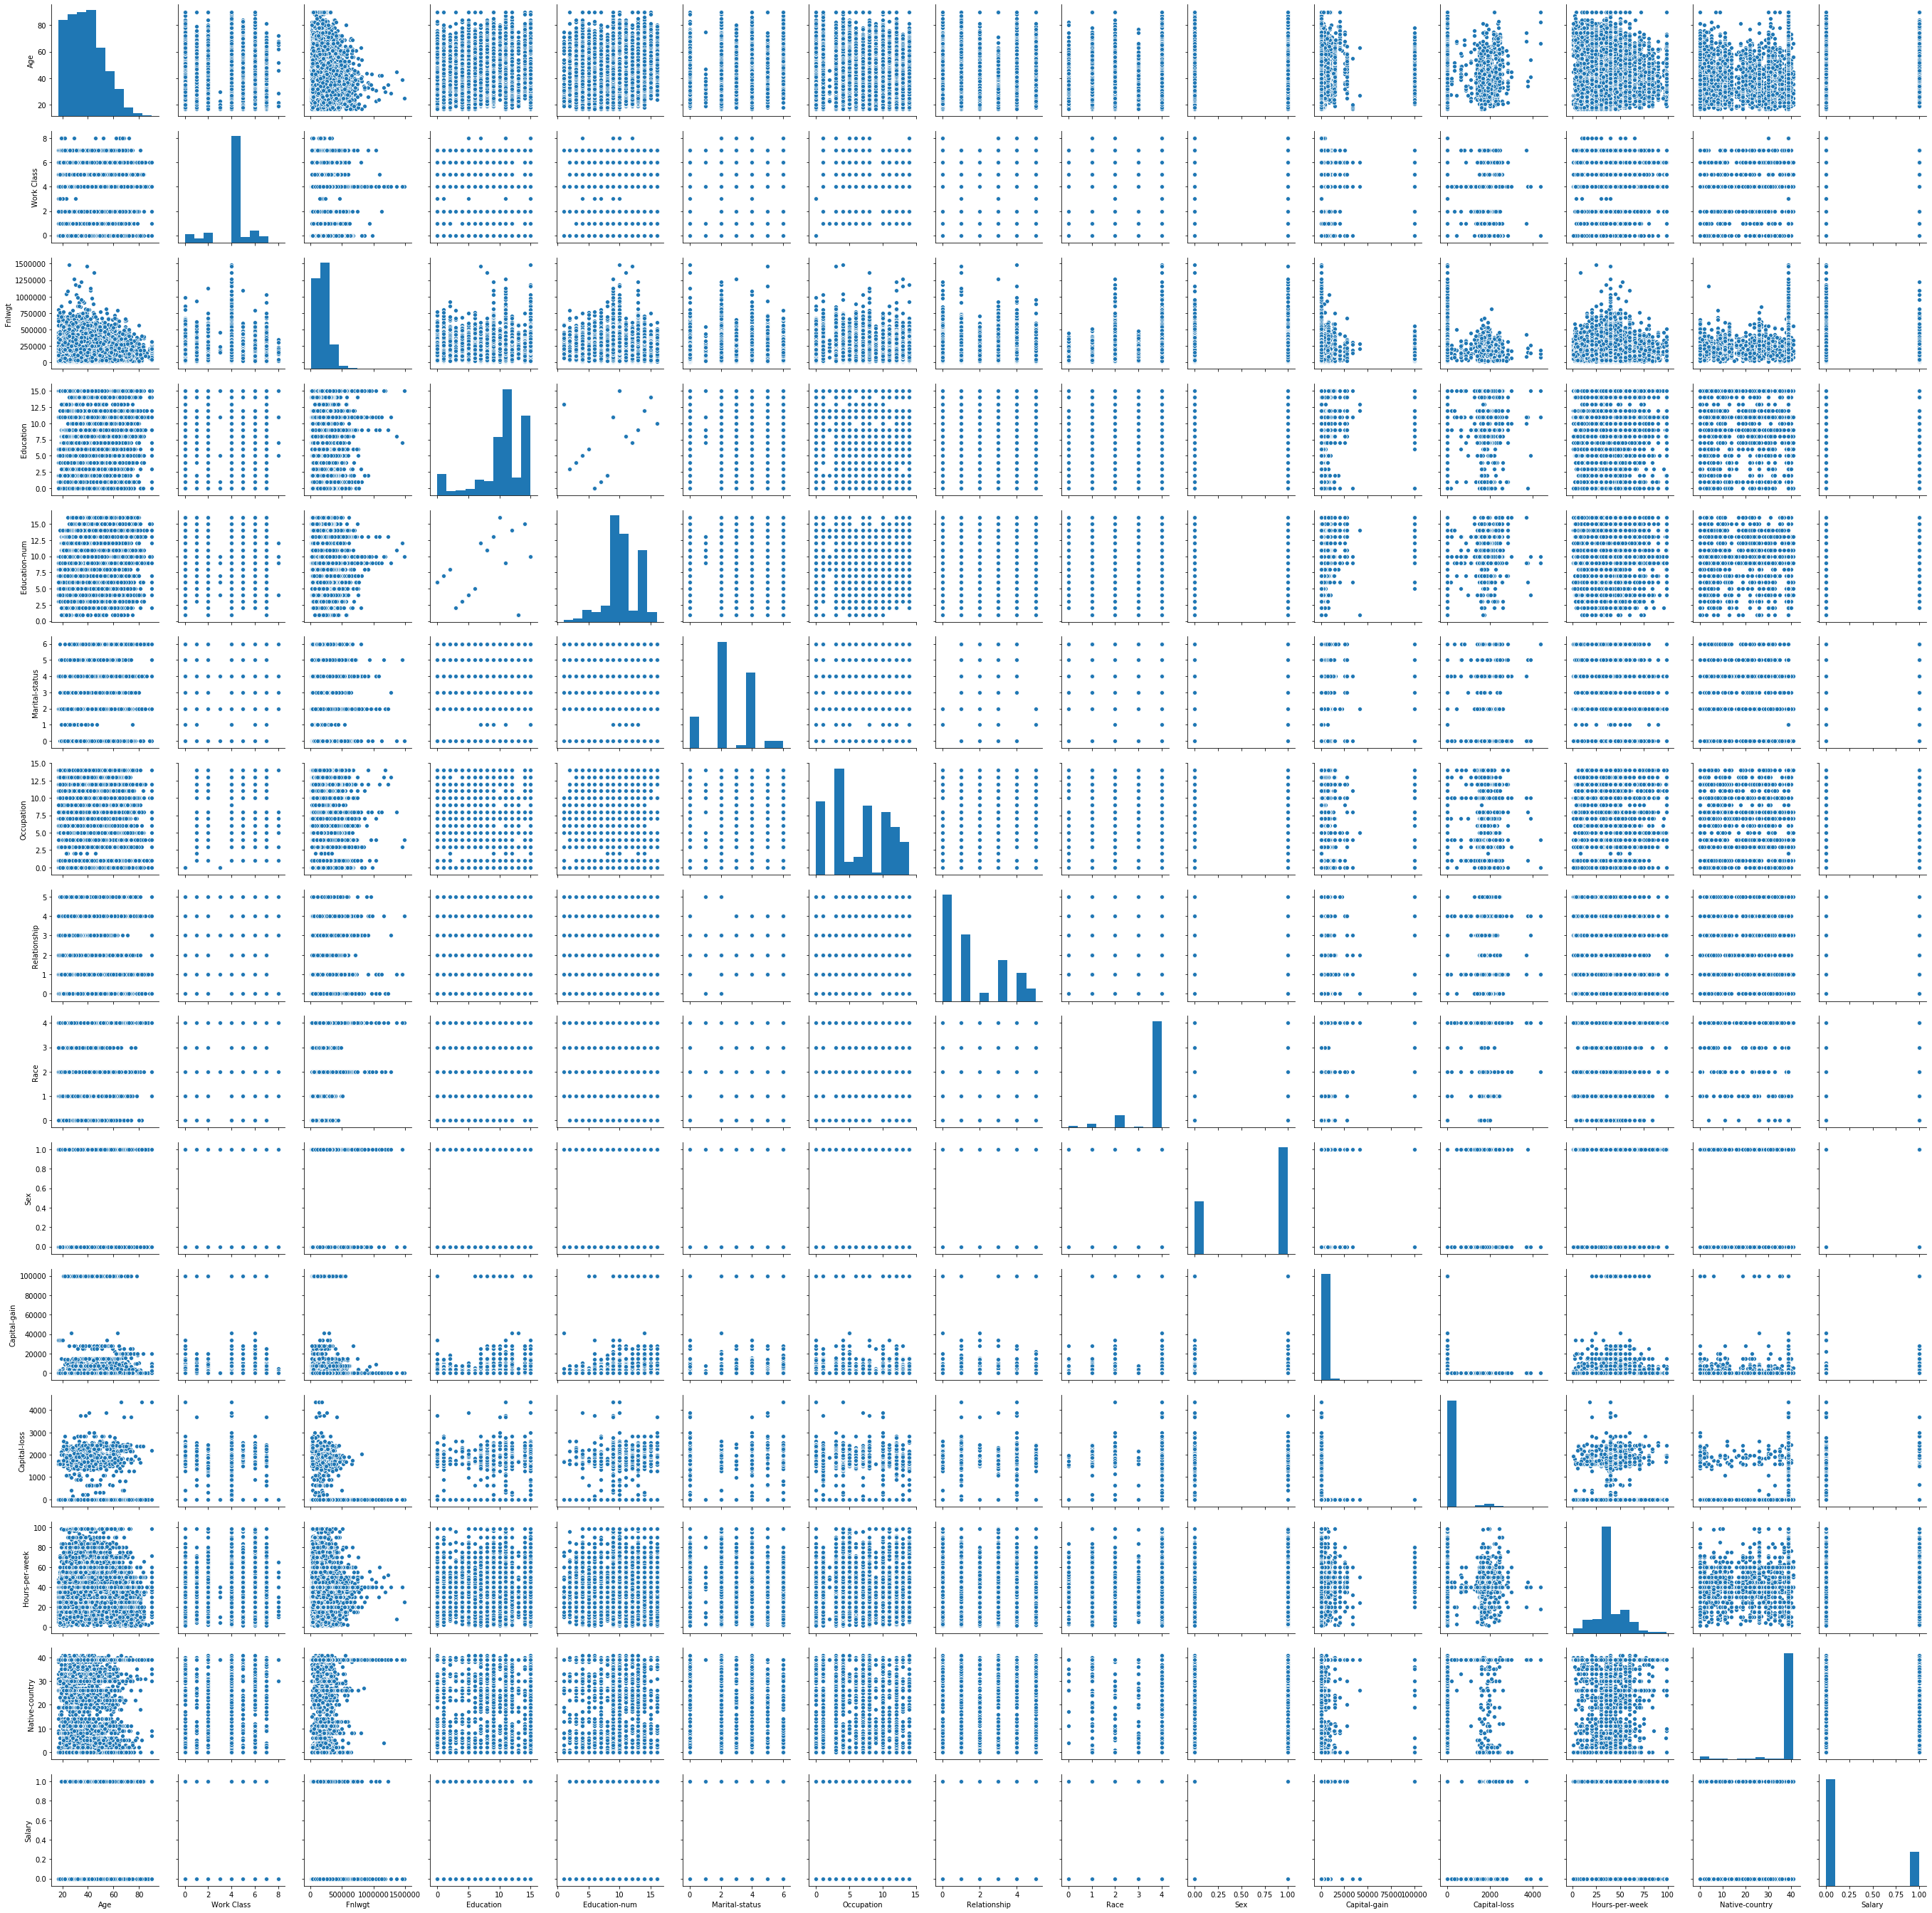

In [44]:
sns.pairplot(df)

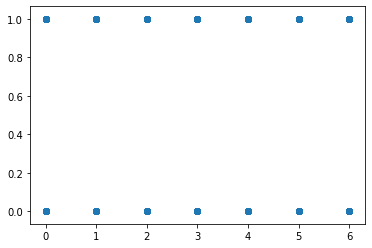

In [45]:
plt.scatter(df['Marital-status'],df['Salary'])
plt.show()

In [46]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[0.83709708, 1.46388339, 1.0087417 , ..., 2.22212013, 0.29157343,
        0.5632099 ],
       [0.04264043, 0.09012148, 0.24504633, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.05703146, 0.09012148, 0.42576955, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       ...,
       [1.42358875, 0.09012148, 0.3588108 , ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.21562378, 0.09012148, 0.11092744, ..., 1.65520046, 0.29157343,
        0.5632099 ],
       [0.98372   , 0.77700244, 0.92986178, ..., 0.03542999, 0.29157343,
        1.77553698]])

In [47]:
threshold = 3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [48]:
z[3][13]

4.054156655343599

In [49]:
df_new=df[((z<3).all(axis=1))]

In [50]:
df_new

,Age,Work Class,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Salary
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [51]:
df.shape

(32560, 15)

In [82]:
x=df.iloc[:,0:-1]
x.head()

,Age,Work Class,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39


In [84]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Salary, Length: 32560, dtype: int32

In [85]:
x.shape

(32560, 14)

In [58]:
y.shape

(32560,)

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)

In [87]:
x_train.shape

(21815, 14)

In [88]:
y_train.shape

(21815,)

In [89]:
x_test.shape

(10745, 14)

In [90]:
y_test.shape

(10745,)

In [127]:
lg = LogisticRegression()

In [128]:
lg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print('accuracy_score:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[0 0 0 ... 0 1 0]
accuracy_score: 0.7854816193578409
[[7691  425]
 [1880  749]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      8116
           1       0.64      0.28      0.39      2629

    accuracy                           0.79     10745
   macro avg       0.72      0.62      0.63     10745
weighted avg       0.76      0.79      0.75     10745



In [125]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
predgnb = gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7941368078175896
[[7718  398]
 [1814  815]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      8116
           1       0.67      0.31      0.42      2629

    accuracy                           0.79     10745
   macro avg       0.74      0.63      0.65     10745
weighted avg       0.78      0.79      0.76     10745



In [111]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('actual and predicted value score',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

actual and predicted value score 0.7554211261051652
[[8111    5]
 [2623    6]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      8116
           1       0.55      0.00      0.00      2629

    accuracy                           0.76     10745
   macro avg       0.65      0.50      0.43     10745
weighted avg       0.70      0.76      0.65     10745



In [120]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=5)
Knn.fit(x_train,y_train)
predknn = Knn.predict(x_test)
predknn
print('accuracy_score',accuracy_score(predknn,y_test))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy_score 0.7708701721731037
[[7468  648]
 [1814  815]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      8116
           1       0.56      0.31      0.40      2629

    accuracy                           0.77     10745
   macro avg       0.68      0.62      0.63     10745
weighted avg       0.74      0.77      0.75     10745



In [121]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct.fit(x_train,y_train)
preddct = dct.predict(x_test)
preddct
print('accuracy_score',accuracy_score(preddct,y_test))
print(confusion_matrix(y_test,preddct))
print(classification_report(y_test,preddct))

accuracy_score 0.8043741275011633
[[7052 1064]
 [1038 1591]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      8116
           1       0.60      0.61      0.60      2629

    accuracy                           0.80     10745
   macro avg       0.74      0.74      0.74     10745
weighted avg       0.81      0.80      0.80     10745

